# import Lib

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.lines as lines

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


# import Data

In [2]:
# import Data
data = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')
df = data
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Data check

In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# checking missing samples!
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
values, counts = np.unique(df['label'], return_counts=True)
print('number of unique labels is %i\n'% len(values))
for (i, j) in zip(values, counts):
    print('number of %s Labels in dataset is %i'% (i, j))

number of unique labels is 22

number of apple Labels in dataset is 100
number of banana Labels in dataset is 100
number of blackgram Labels in dataset is 100
number of chickpea Labels in dataset is 100
number of coconut Labels in dataset is 100
number of coffee Labels in dataset is 100
number of cotton Labels in dataset is 100
number of grapes Labels in dataset is 100
number of jute Labels in dataset is 100
number of kidneybeans Labels in dataset is 100
number of lentil Labels in dataset is 100
number of maize Labels in dataset is 100
number of mango Labels in dataset is 100
number of mothbeans Labels in dataset is 100
number of mungbean Labels in dataset is 100
number of muskmelon Labels in dataset is 100
number of orange Labels in dataset is 100
number of papaya Labels in dataset is 100
number of pigeonpeas Labels in dataset is 100
number of pomegranate Labels in dataset is 100
number of rice Labels in dataset is 100
number of watermelon Labels in dataset is 100


# <span style='background :yellow' > <font color='green'>Visualization Dataset</font> </span>

In [7]:
# def boxplot_show(Dataset, col, label_col ="label"):
#     plt.figure(figsize=(20,5))
#     plt.xticks(rotation=45)
#     sns.boxplot(data=Dataset, x = label_col, y = col)
#     plt.grid()
#     plt.show()
#     return True

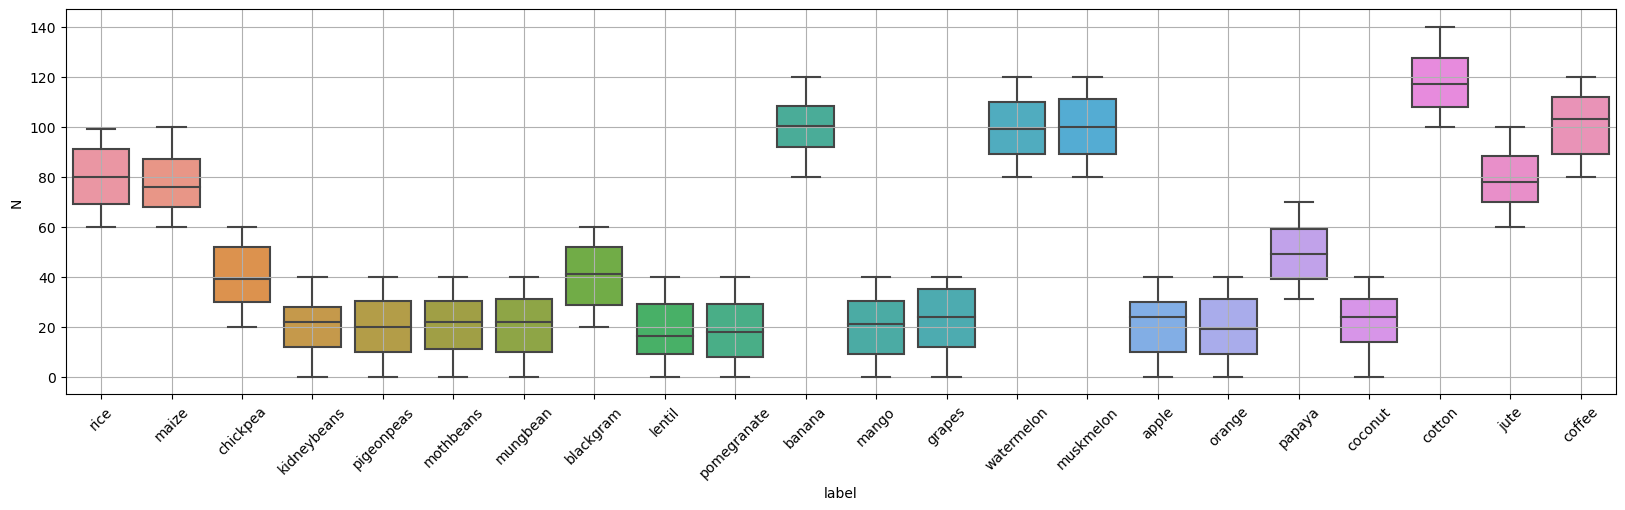

In [8]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data=df, x = 'label', y = 'N')
plt.grid()
plt.show()

* <b>High requarment of Nitrogen in soil: </b> banana, watermelon, muskmelon, cotton, coffee
* <b>Nirogen ranges of variations for each specific crop: </b> about 40
* Most crops do not need much Nitrogen

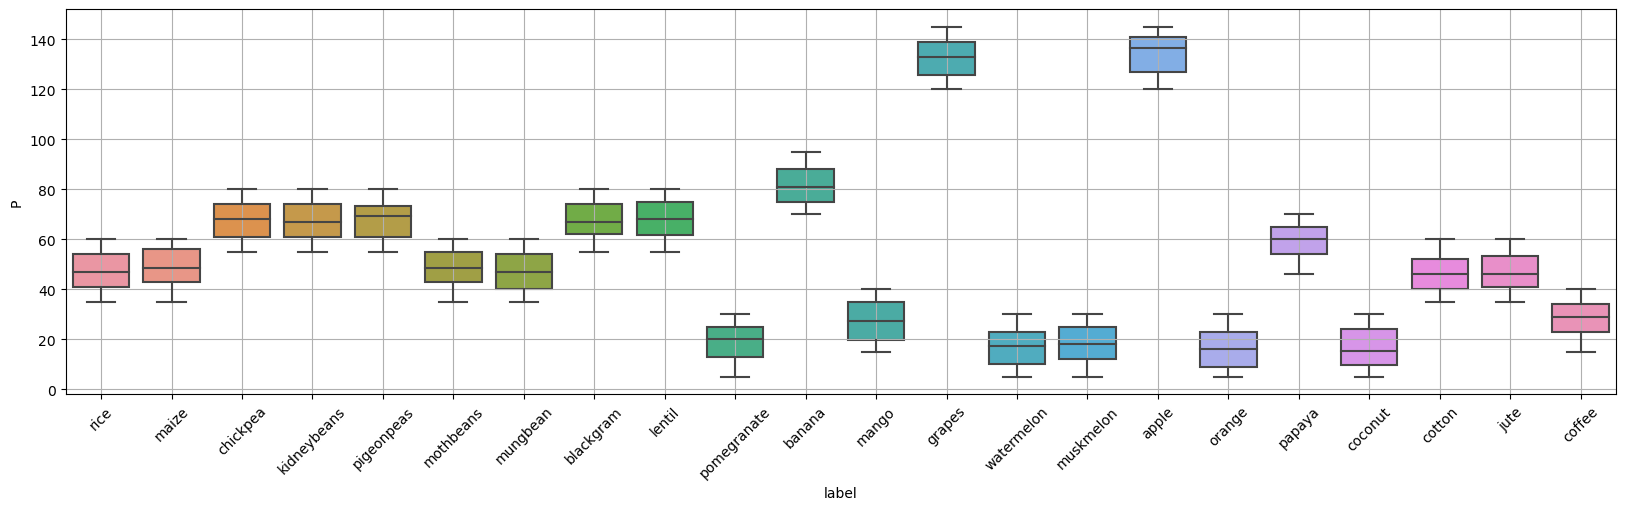

In [9]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data=df, x = 'label', y = 'P')
plt.grid()
plt.show()

* <b>High requirement of Phosphorous in soil: </b> grapes, apple
* <b>low Phosphorous in soil: </b> pomegranate, watermelon, muskmelon, orange, coconut

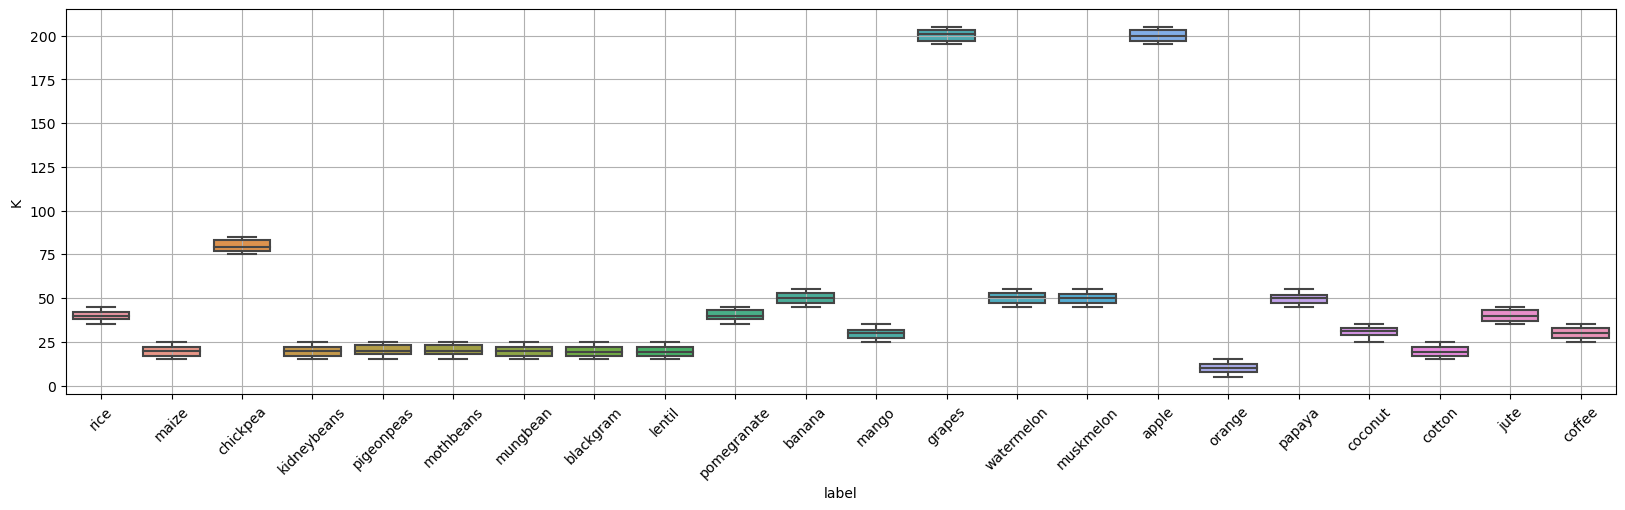

In [10]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data=df, x = 'label', y = 'K')
plt.grid()
plt.show()

* low range of variations Potassium
* <b>High requirement of Potassium in soil: </b> grapes, apple
* <b>Low requirement of Potassium in soil: </b> orange
* <b>Low requirement of Potassium in soil for 9 crops: </b> less than 25

## Result of N, P, K charts
* <b>High requarment of Nitrogen in soil: </b> banana, watermelon, muskmelon, cotton, coffee
* <b>Nirogen ranges of variations for each specific crop: </b> about 40
* <b>High requirement of Phosphorous in soil: </b> grapes, apple
* <b>low Phosphorous in soil: </b> pomegranate, watermelon, muskmelon, orange, coconut
* low range of variations Potassium
* <b>High requirement of Potassium in soil: </b> grapes, apple
* <b>Low requirement of Potassium in soil: </b> orange
* <b>apple & grapes need K, P a lot</b>

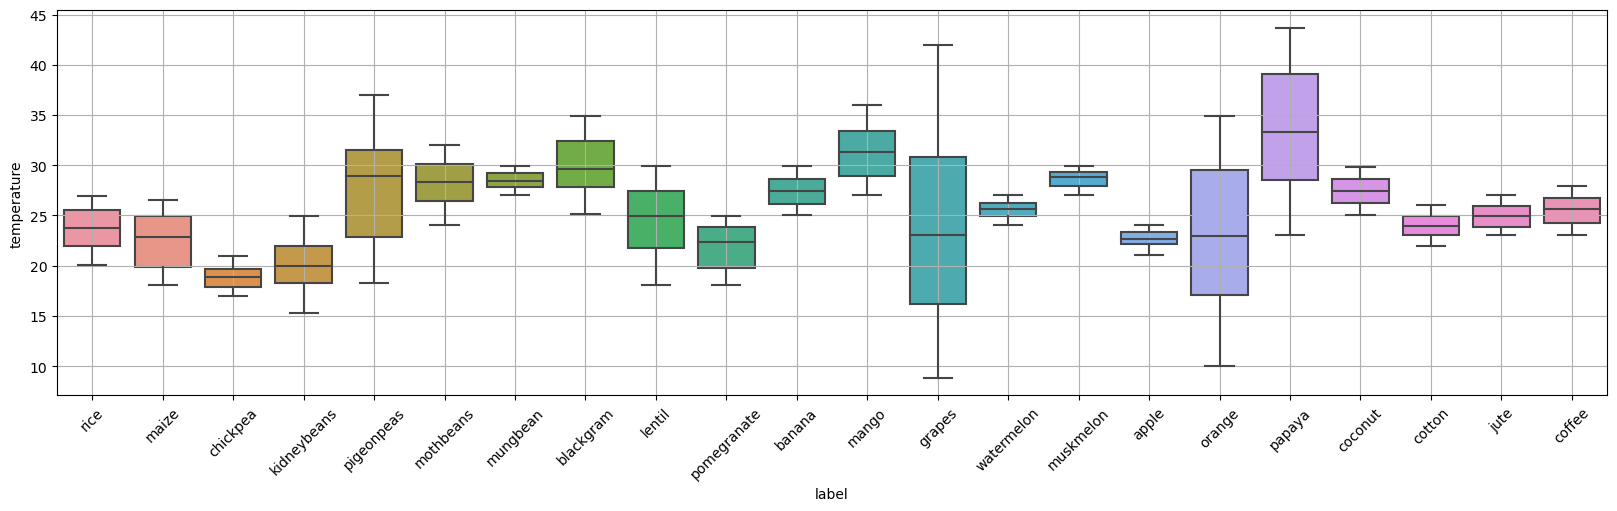

In [11]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data=df, x = 'label', y = 'temperature')
plt.grid()
plt.show()

* <b>Crops that are not sensitive to extreme temperature changes: </b>pigeonpeas, grapes, orange, papaya
* more crops planing in range 15-35 degree

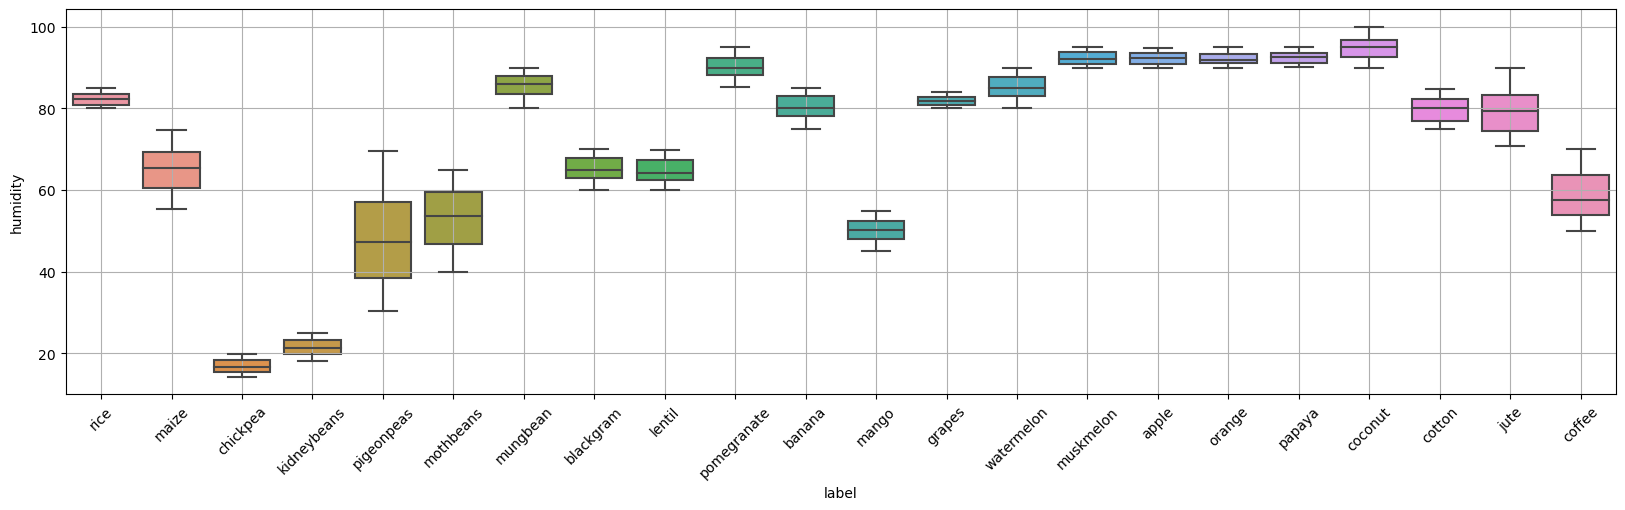

In [12]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data=df, x = 'label', y = 'humidity')
plt.grid()
plt.show()

* more crops planing with humidity of more than 60 
* <b>low humidity: </b> chickpea, kidneybeans
* <b>Wide range of humidity: </b> pigeonpeas, mothbeans

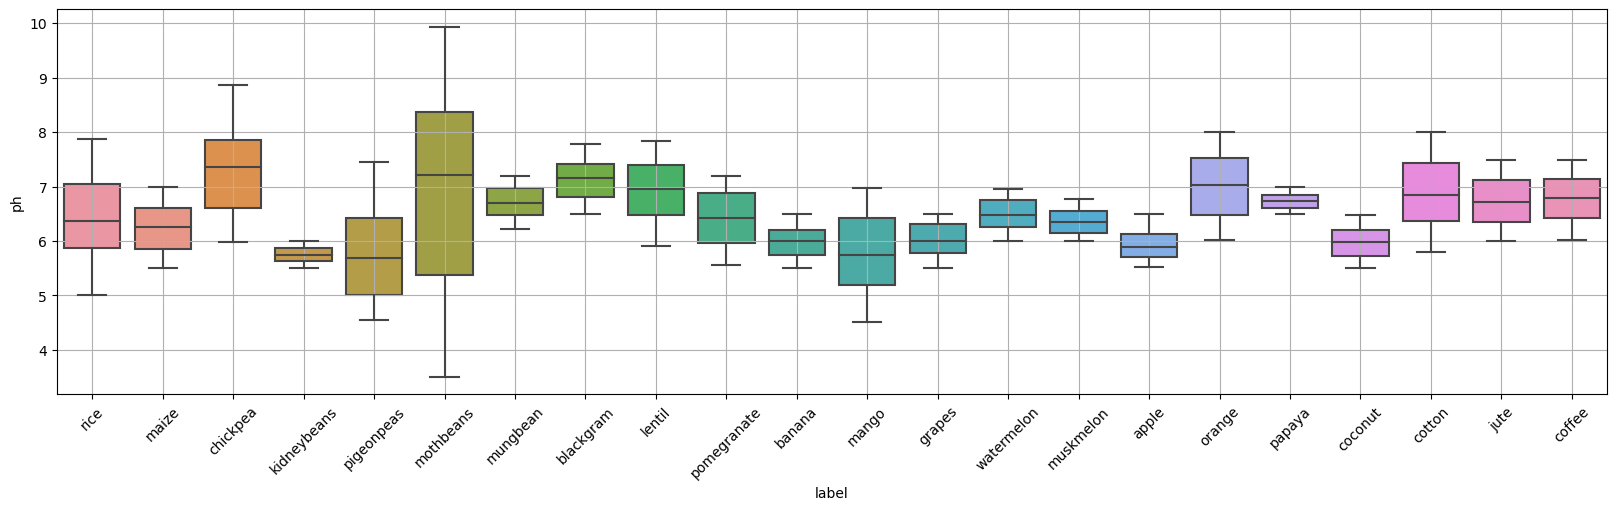

In [13]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data=df, x = 'label', y = 'ph')
plt.grid()
plt.show()

* <b>crops that range of PH in low: </b> papaya, kidneybeans
* <b>Many changes in PH: </b>mothbeans

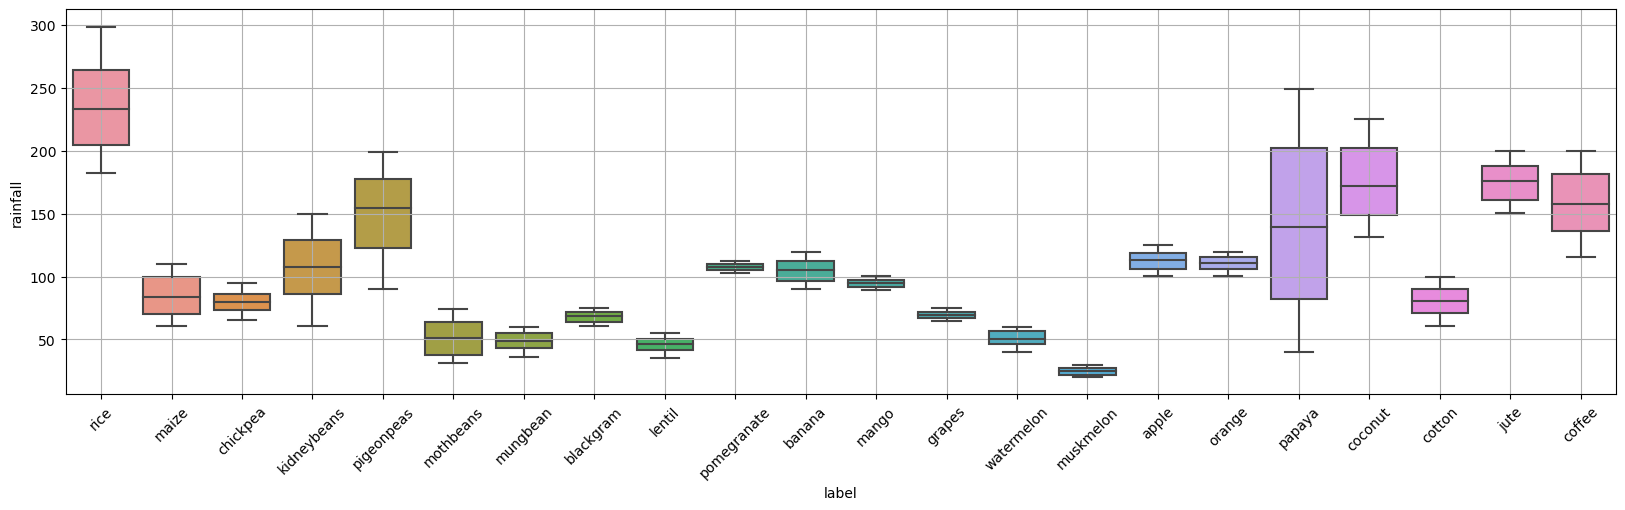

In [14]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data=df, x = 'label', y = 'rainfall')
plt.grid()
plt.show()

* <b>High amount of rainfall: </b>rice >>>> pigeonpeas, coconut, jute, coffe
* <b>Low amount of rainfall: </b>muskmelon

# Divide DataSet to X(feature) and y(Target)

In [15]:
X = df.copy()
X.drop('label', axis=1, inplace=True)
y = df['label'].copy()

# X(feature) Correlation Matrix 

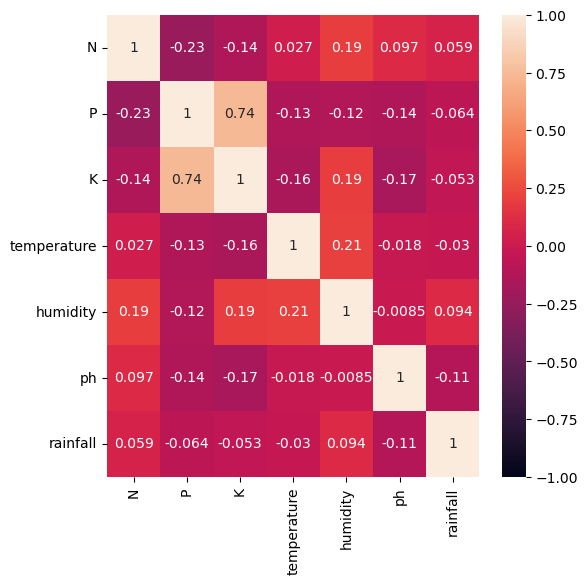

In [16]:
plt.figure(figsize=(6, 6))
# define the mask to set the values in the upper triangle to True
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)

<b>Correlated Features: </b> 
- K & P : 0.74  
- P & N : -0.23
- <b>humidity & temp : 0.21</b>
- <b>humidity & K : 0.19</b>
- <b>humidity & N : 0.19</b>
- ph & K : -0.17
- temp & K : -0.16
- ph & P : -0.14
- K & N : -0.14
- temp & P : -0.13
- rainfall & ph : -0.11

# Preprocessing dataset

## Categorize labels in y(Target) data

In [17]:
uniq_num = y.nunique()
uniq_val = y.unique()

for i in range(uniq_num):
    y.replace(uniq_val[i], i+1, inplace= True)
    
y    

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: label, Length: 2200, dtype: int64

In [18]:
crop_label = {}
for index, LABEL in enumerate(uniq_val):
    crop_label[LABEL] = {index+1}
crop_label

{'rice': {1},
 'maize': {2},
 'chickpea': {3},
 'kidneybeans': {4},
 'pigeonpeas': {5},
 'mothbeans': {6},
 'mungbean': {7},
 'blackgram': {8},
 'lentil': {9},
 'pomegranate': {10},
 'banana': {11},
 'mango': {12},
 'grapes': {13},
 'watermelon': {14},
 'muskmelon': {15},
 'apple': {16},
 'orange': {17},
 'papaya': {18},
 'coconut': {19},
 'cotton': {20},
 'jute': {21},
 'coffee': {22}}

## Normalize X data

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
X.shape

(2200, 7)

## Train and Test Splitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify= y)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1100, 7) (1100, 7) (1100,) (1100,)


# Train Models

## **RF**

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# acc = dict()
# for i in range(100):
#     RF_clf = RandomForestClassifier(n_estimators=100,  max_depth=3)
#     RF_clf = RF_clf.fit(X_train, y_train)
#     RF_y_pred = RF_clf.predict(X_test)
#     acc[i] = metrics.accuracy_score(y_test, RF_y_pred)

In [24]:
# fig = plt.figure(figsize=(20,5))
# plt.plot(range(100), acc.values())
# plt.axhline(y = np.array(list(acc.values())).mean(), xmin=0, xmax=200, color = 'r', linestyle = '--', label= "Mean Accuracy: {}".format(np.array(list(acc.values())).mean().round(4)))
# plt.legend(fontsize=14)
# plt.grid()
# plt.show()

In [25]:
RF_clf = RandomForestClassifier(n_estimators=50,  max_depth=3)
RF_clf = RF_clf.fit(X_train, y_train)
RF_y_pred = RF_clf.predict(X_test)

### Metrics

In [26]:
print(metrics.classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           1       0.78      0.92      0.84        50
           2       1.00      0.96      0.98        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      0.72      0.84        50
           6       1.00      0.48      0.65        50
           7       0.93      1.00      0.96        50
           8       0.65      1.00      0.79        50
           9       0.88      1.00      0.93        50
          10       1.00      1.00      1.00        50
          11       0.94      1.00      0.97        50
          12       0.89      1.00      0.94        50
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        50
          15       1.00      1.00      1.00        50
          16       1.00      1.00      1.00        50
          17       1.00      1.00      1.00        50
          18       1.00    

* **in classification_report crop with "6/0.42/0.25/0.31/20" data should be check**

In [27]:
print('cohen_kappa_score: ', metrics.cohen_kappa_score(y_test, RF_y_pred))
print('f1_score: ', metrics.f1_score(y_test, RF_y_pred, average='macro'))
print('accuracy_score: ', metrics.accuracy_score(y_test, RF_y_pred))

cohen_kappa_score:  0.9276190476190476
f1_score:  0.9272798801661661
accuracy_score:  0.9309090909090909


In [28]:
# cross_validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF_clf, X, y, cv=10)
print(scores)
print(scores.mean())

[0.89545455 0.92727273 0.92272727 0.92272727 0.93636364 0.89090909
 0.93181818 0.87272727 0.91818182 0.91363636]
0.9131818181818183


In [29]:
for i in range(10):
    print(f"Sample {i+1}: Label = {RF_clf.predict_proba(X_test)[i,:].argmax()+1}, Probability = {RF_clf.predict_proba(X_test)[i,:].max()}, actual Label = {y_test.iloc[i]}")

Sample 1: Label = 14, Probability = 0.25864796640817106, actual Label = 14
Sample 2: Label = 19, Probability = 0.193640521824883, actual Label = 19
Sample 3: Label = 20, Probability = 0.19226010273020416, actual Label = 20
Sample 4: Label = 19, Probability = 0.18451825657355056, actual Label = 19
Sample 5: Label = 17, Probability = 0.29192781980420474, actual Label = 17
Sample 6: Label = 13, Probability = 0.4947942457343697, actual Label = 13
Sample 7: Label = 2, Probability = 0.22054822144850297, actual Label = 2
Sample 8: Label = 14, Probability = 0.24218006672431322, actual Label = 14
Sample 9: Label = 6, Probability = 0.1835215703280897, actual Label = 6
Sample 10: Label = 1, Probability = 0.16243041832456565, actual Label = 1


* **when we checking the proba of sample, we undrestan that RF classifier is not good for this data, because of low proba of selected label!**

## **SVM**

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#SVM Parameter:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
SVM_clf = make_pipeline(SVC(C=7, gamma='auto', probability=True, kernel='linear'))
SVM_clf.fit(X, y)
SVM_y_pred = SVM_clf.predict(X_test)

In [31]:
print('cohen_kappa_score: ', metrics.cohen_kappa_score(y_test, SVM_y_pred))
print('f1_score: ', metrics.f1_score(y_test, SVM_y_pred, average='macro'))
print('accuracy_score: ', metrics.accuracy_score(y_test, SVM_y_pred))

cohen_kappa_score:  0.9895238095238095
f1_score:  0.9899826335686377
accuracy_score:  0.99


In [32]:
# checking proba of prediction for each sample:
for i in range(10):
    print(f"Sample {i+1}: pred Label = {SVM_clf.predict_proba(X_test)[i,:].argmax()+1}, Probability = {SVM_clf.predict_proba(X_test)[i,:].max()}, actual Label = {y_test.iloc[i]}")

Sample 1: pred Label = 14, Probability = 0.9092353921318743, actual Label = 14
Sample 2: pred Label = 19, Probability = 0.963272423468715, actual Label = 19
Sample 3: pred Label = 20, Probability = 0.9393868459849682, actual Label = 20
Sample 4: pred Label = 19, Probability = 0.9965628508262663, actual Label = 19
Sample 5: pred Label = 17, Probability = 0.9449326413238718, actual Label = 17
Sample 6: pred Label = 13, Probability = 0.9605495213114007, actual Label = 13
Sample 7: pred Label = 2, Probability = 0.8717416026962043, actual Label = 2
Sample 8: pred Label = 14, Probability = 0.8665316706239663, actual Label = 14
Sample 9: pred Label = 6, Probability = 0.9481568617549738, actual Label = 6
Sample 10: pred Label = 1, Probability = 0.9899179840217077, actual Label = 1


In [33]:
# classification report
print(metrics.classification_report(y_test, SVM_y_pred))

              precision    recall  f1-score   support

           1       0.98      0.86      0.91        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       0.98      0.98      0.98        50
           7       1.00      1.00      1.00        50
           8       1.00      0.98      0.99        50
           9       0.96      0.98      0.97        50
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        50
          12       1.00      1.00      1.00        50
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        50
          15       1.00      1.00      1.00        50
          16       1.00      1.00      1.00        50
          17       1.00      1.00      1.00        50
          18       1.00    

In [34]:
# cross_validation
scores = cross_val_score(SVM_clf, X, y, cv=10)
print(scores)
print(scores.mean())

[0.99090909 0.96818182 0.98636364 0.97727273 0.98636364 0.99090909
 0.99090909 0.96818182 0.98181818 0.99545455]
0.9836363636363638
